<a href="https://colab.research.google.com/github/lekhs2604/perform-time-series-analysis/blob/main/Golden_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df=pd.read_csv('/content/long_data_.csv')
df.head(7)


,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
5,Uttarakhand,NR,30.320409,78.050006,02/01/2019 00:00:00,40.7
6,HP,NR,31.100025,77.166597,02/01/2019 00:00:00,30.0


In [ ]:
df.describe()

,latitude,longitude,Usage
count,16599.000000,16599.000000,16599.000000
mean,23.178220,81.794533,103.001862
std,6.146575,7.258429,116.044056
min,8.900373,71.192400,0.300000
25%,19.820430,76.569993,6.700000
50%,23.835404,78.570026,64.400000
75%,27.333330,88.329947,173.900000
max,33.450000,94.216667,522.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [ ]:
df['New_time']=pd.to_datetime (df['Dates']).dt.time
df1=df
df.head()

,States,Regions,latitude,longitude,Dates,Usage,New_time
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,00:00:00
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3,00:00:00
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1,00:00:00
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8,00:00:00
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9,00:00:00


In [ ]:
df['Regions'].unique()

array(['NR', 'WR', 'SR', 'ER', 'NER'], dtype=object)

In [ ]:
df1[df1['Usage']== df['Usage'].max()]

,States,Regions,latitude,longitude,Dates,Usage,New_time
5424,Maharashtra,WR,19.250232,73.160175,20/06/2019 00:00:00,522.1,00:00:00


In [ ]:
df1[df1['Usage']== df['Usage'].min()]

,States,Regions,latitude,longitude,Dates,Usage,New_time
12730,Sikkim,ER,27.33333,88.616647,03/02/2020 00:00:00,0.3,00:00:00


In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')
df['New_Date'] = df['Dates'].dt.date
df.head()

,States,Regions,latitude,longitude,Dates,Usage,New_time,New_Date
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,00:00:00,2019-01-02
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,00:00:00,2019-01-02
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,00:00:00,2019-01-02
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,00:00:00,2019-01-02
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,00:00:00,2019-01-02


In [ ]:
df1['year'] = pd.DatetimeIndex(df1['New_Date']).year
df1.head()

,States,Regions,latitude,longitude,Dates,Usage,New_time,New_Date,year
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,00:00:00,2019-01-02,2019
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,00:00:00,2019-01-02,2019
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,00:00:00,2019-01-02,2019
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,00:00:00,2019-01-02,2019
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,00:00:00,2019-01-02,2019


In [ ]:
df1['New_Date'].unique()

array([datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 1, 5),
       datetime.date(2019, 1, 6), datetime.date(2019, 1, 7),
       datetime.date(2019, 1, 8), datetime.date(2019, 1, 9),
       datetime.date(2019, 1, 10), datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 13),
       datetime.date(2019, 1, 14), datetime.date(2019, 1, 15),
       datetime.date(2019, 1, 16), datetime.date(2019, 1, 17),
       datetime.date(2019, 1, 18), datetime.date(2019, 1, 19),
       datetime.date(2019, 1, 20), datetime.date(2019, 1, 21),
       datetime.date(2019, 1, 22), datetime.date(2019, 1, 23),
       datetime.date(2019, 1, 24), datetime.date(2019, 1, 25),
       datetime.date(2019, 1, 26), datetime.date(2019, 1, 27),
       datetime.date(2019, 1, 28), datetime.date(2019, 1, 29),
       datetime.date(2019, 1, 30), datetime.date(2019, 1, 31),
       datetime.date(2019, 2, 2), datetime.date(2019, 2, 3),
  

In [ ]:
df1[df1['New_Date']==2019].nunique()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
New_time     0
New_Date     0
year         0
dtype: int64

In [ ]:
df1[df1['New_Date']==2020].nunique()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
New_time     0
New_Date     0
year         0
dtype: int64

In [ ]:
df1['year'].unique()

array([2019, 2020])

In [ ]:
df1[df1['year']==2019].nunique()

States         33
Regions         5
latitude       33
longitude      32
Dates         354
Usage        3231
New_time        1
New_Date      354
year            1
dtype: int64

In [ ]:
df1[df1['year']==2020].nunique()

States         33
Regions         5
latitude       33
longitude      32
Dates         144
Usage        1976
New_time        1
New_Date      144
year            1
dtype: int64

In [ ]:
print(df.shape)
df['Usage'].value_counts()

(16599, 9)


2.2      328
2.1      315
2.3      207
1.7      178
2.0      158
        ... 
462.2      1
326.8      1
87.0       1
295.8      1
323.7      1
Name: Usage, Length: 3627, dtype: int64

In [ ]:
count_df = pd.DataFrame(df['year'].value_counts())
count_df

,year
2019,11847
2020,4752


In [ ]:
print(df.shape)
df['Dates'].value_counts()

(16599, 9)


2019-07-12    66
2019-07-11    66
2019-07-10    66
2019-07-09    66
2019-07-08    66
              ..
2019-06-16    33
2019-06-15    33
2019-06-14    33
2019-06-13    33
2020-12-05    33
Name: Dates, Length: 498, dtype: int64

In [ ]:
print(df.shape)
df['year'].value_counts()

(16599, 9)


2019    11847
2020     4752
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='Usage'>

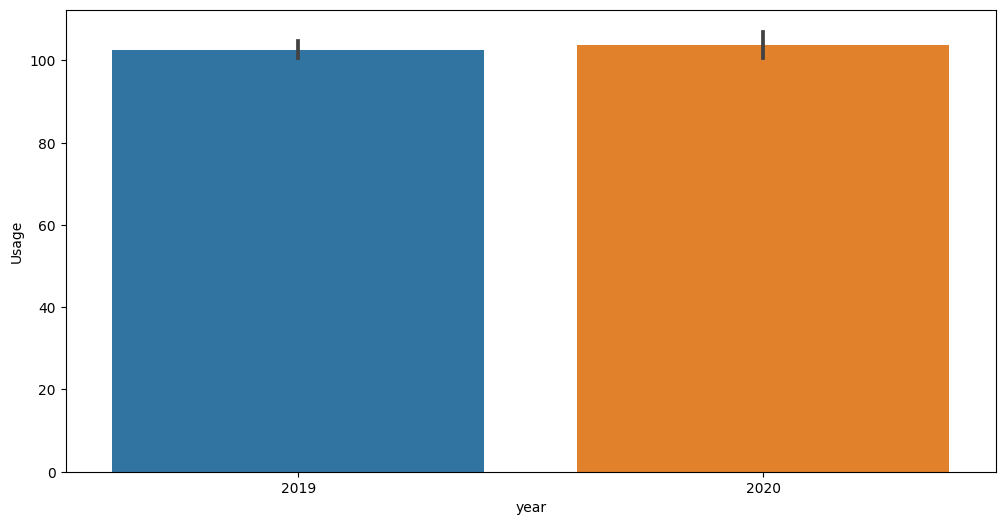

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'year',y='Usage',data=df)

<Axes: xlabel='Regions', ylabel='Usage'>

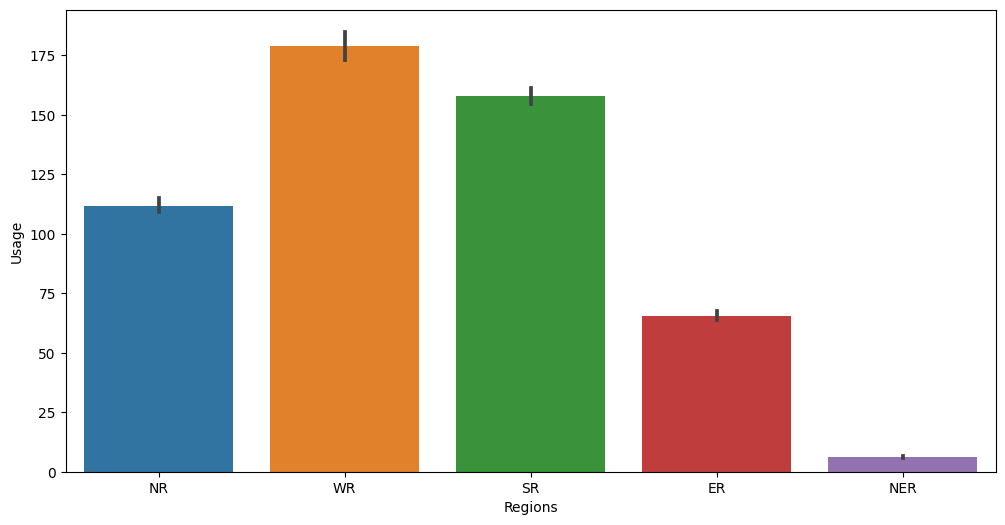

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Regions',y='Usage',data=df)

<Axes: xlabel='States', ylabel='Usage'>

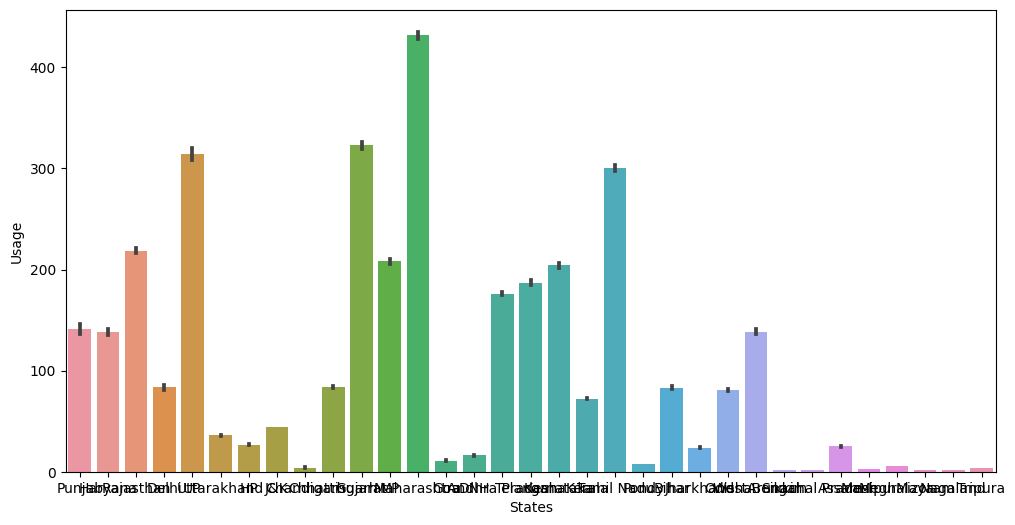

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'States',y='Usage',data=df)

<Axes: xlabel='Dates', ylabel='Usage'>

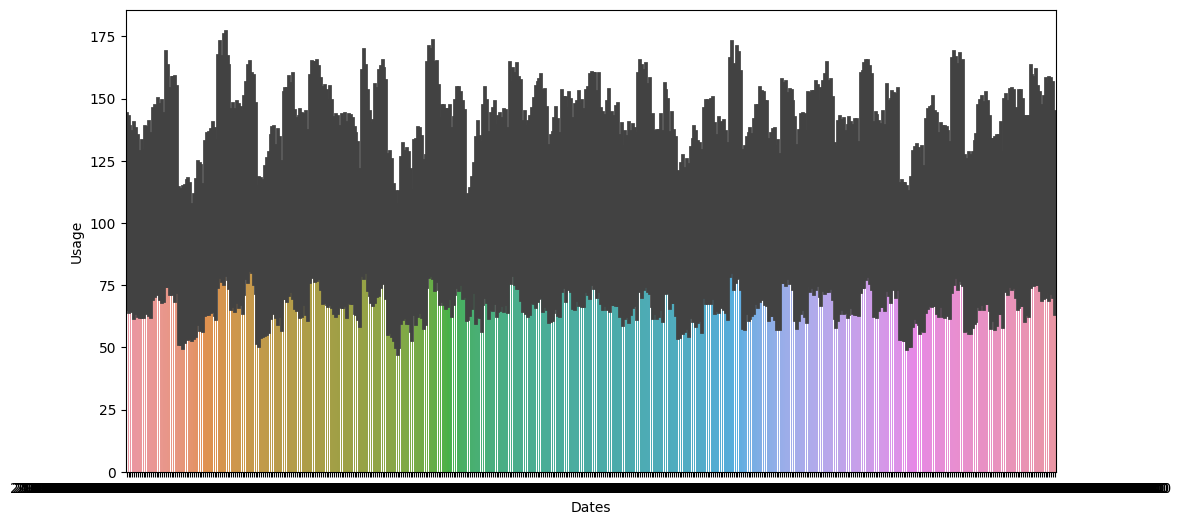

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Dates',y='Usage',data=df)

<Axes: xlabel='Usage', ylabel='Count'>

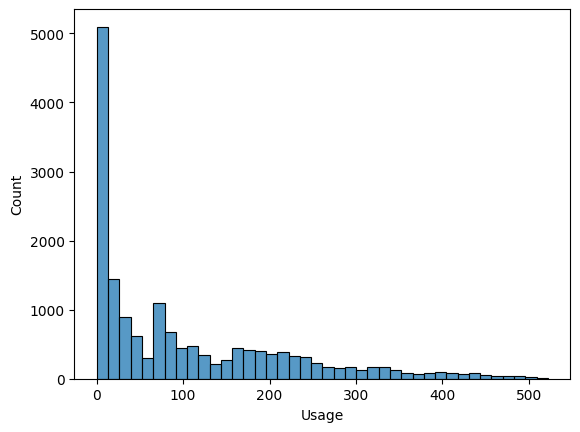

In [ ]:
sns.histplot(df1['Usage'])

<Axes: xlabel='year', ylabel='Usage'>

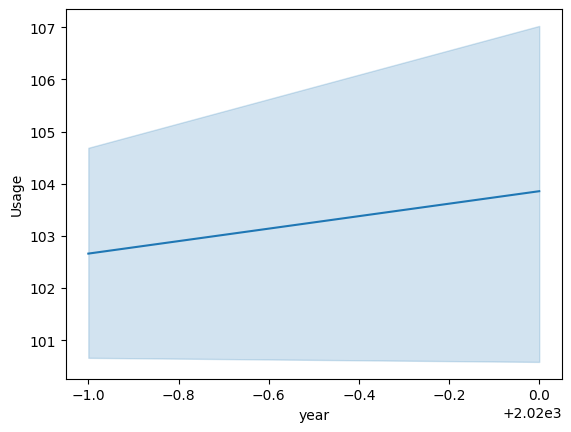

In [ ]:
sns.lineplot(x=df1['year'] ,y=df1['Usage'],data=df1)


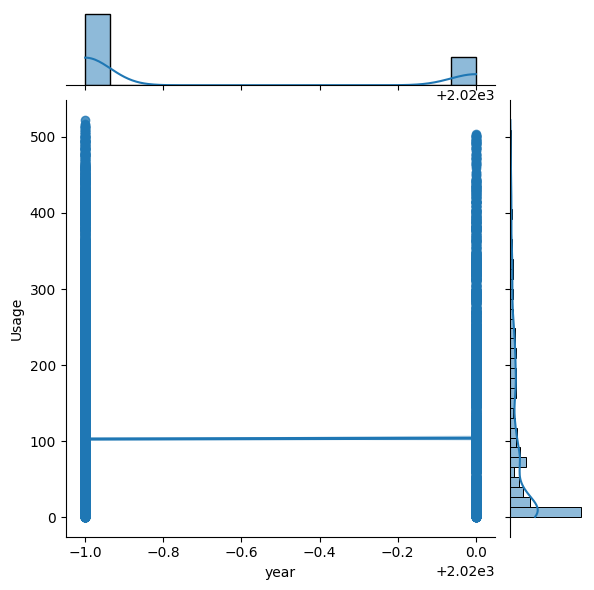

In [ ]:
sns.jointplot(x=df1['year'],y=df1['Usage'],data=df1,kind='reg')

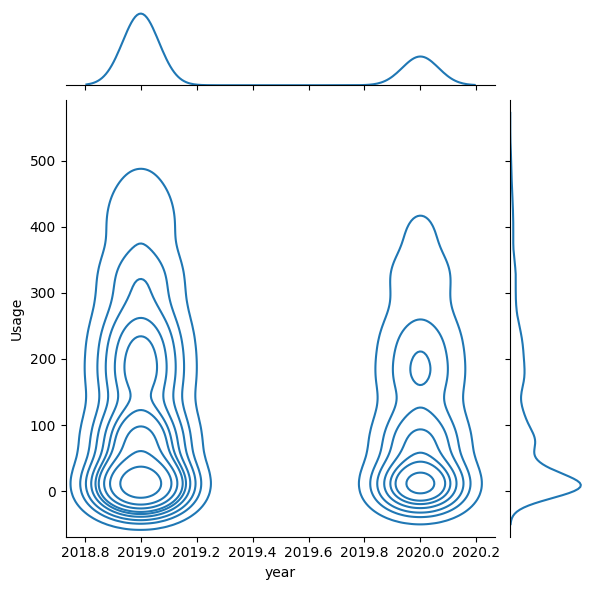

In [ ]:
sns.jointplot(x=df1['year'],y=df1['Usage'],data=df1,kind='kde')

<Axes: xlabel='Dates', ylabel='Usage'>

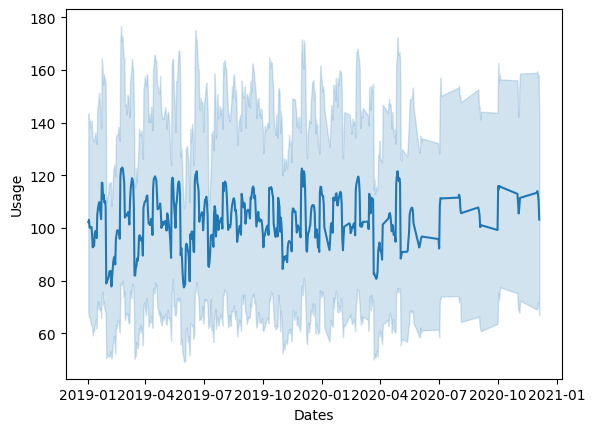

In [ ]:
sns.lineplot(x=df1['Dates'] ,y=df1['Usage'],data=df1)

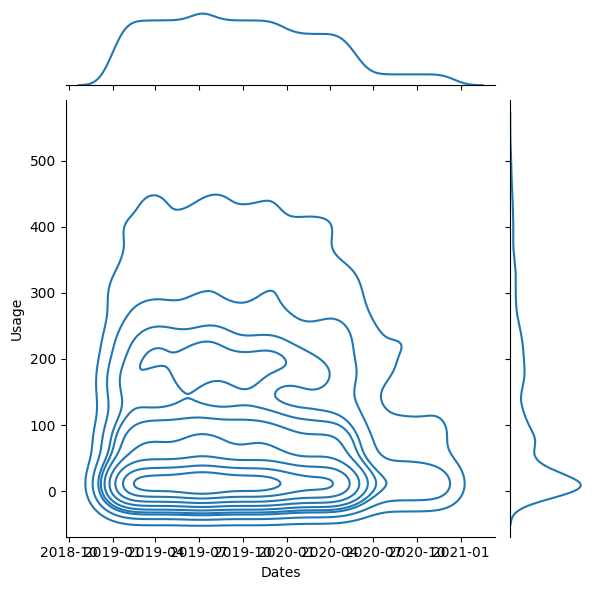

In [ ]:
sns.jointplot(x=df1['Dates'],y=df1['Usage'],data=df1,kind='kde')